In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [3]:
url=('https://raw.githubusercontent.com/tomekbiel/MT4_Trading_System/refs/heads/master/data/historical/US.100%2B/M5/US.100%2B_M5.csv')
df = pd.read_csv(url)
df

,time,open,high,low,close,tick_volume,spread,real_volume,volume
0,2025.06.18 07:20,21764.58,21767.06,21759.02,21763.31,261.0,0,0,NaN
1,2025.06.18 07:25,21763.31,21764.08,21760.03,21761.32,215.0,0,0,NaN
2,2025.06.18 07:30,21761.53,21772.34,21760.82,21763.57,322.0,0,0,NaN
3,2025.06.18 07:35,21763.02,21765.53,21756.02,21758.58,341.0,0,0,NaN
4,2025.06.18 07:40,21758.54,21765.54,21758.29,21761.58,259.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
5169,2025.07.15 22:35,23020.84,23021.63,23012.32,23020.86,NaN,0,0,466.0
5170,2025.07.15 22:40,23020.82,23021.87,23014.34,23014.34,NaN,0,0,388.0
5171,2025.07.15 22:45,23014.32,23018.63,23011.84,23014.88,NaN,0,0,477.0
5172,2025.07.15 22:50,23015.13,23019.63,23009.40,23019.36,NaN,0,0,389.0


In [4]:
df1=pd.to_datetime(df.time)
#nsq100futures_dataframe=pd.to_datetime(df.Date)
#nsq100futures_dataframe=df.to_csv('nsq100f')

In [6]:
df=df.drop('time',axis=1)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         5174 non-null   float64
 1   high         5174 non-null   float64
 2   low          5174 non-null   float64
 3   close        5174 non-null   float64
 4   tick_volume  2048 non-null   float64
 5   spread       5174 non-null   int64  
 6   real_volume  5174 non-null   int64  
 7   volume       3126 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 323.5 KB


In [7]:
df1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5174 entries, 0 to 5173
Series name: time
Non-Null Count  Dtype         
--------------  -----         
5174 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 40.6 KB


In [8]:
df=pd.concat([df1,df],axis=1)
df

,time,open,high,low,close,tick_volume,spread,real_volume,volume
0,2025-06-18 07:20:00,21764.58,21767.06,21759.02,21763.31,261.0,0,0,NaN
1,2025-06-18 07:25:00,21763.31,21764.08,21760.03,21761.32,215.0,0,0,NaN
2,2025-06-18 07:30:00,21761.53,21772.34,21760.82,21763.57,322.0,0,0,NaN
3,2025-06-18 07:35:00,21763.02,21765.53,21756.02,21758.58,341.0,0,0,NaN
4,2025-06-18 07:40:00,21758.54,21765.54,21758.29,21761.58,259.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...
5169,2025-07-15 22:35:00,23020.84,23021.63,23012.32,23020.86,NaN,0,0,466.0
5170,2025-07-15 22:40:00,23020.82,23021.87,23014.34,23014.34,NaN,0,0,388.0
5171,2025-07-15 22:45:00,23014.32,23018.63,23011.84,23014.88,NaN,0,0,477.0
5172,2025-07-15 22:50:00,23015.13,23019.63,23009.40,23019.36,NaN,0,0,389.0


In [13]:
df.columns
df2=df.drop([ 'open', 'high', 'low',  'tick_volume', 'spread','real_volume', 'volume'],axis=1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    5174 non-null   datetime64[ns]
 1   close   5174 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.0 KB


In [14]:
#df2=df2.drop(['Vol.','Change %'],axis=1)
df.to_csv('cleaned_nsq')

In [15]:
df2

,time,close
0,2025-06-18 07:20:00,21763.31
1,2025-06-18 07:25:00,21761.32
2,2025-06-18 07:30:00,21763.57
3,2025-06-18 07:35:00,21758.58
4,2025-06-18 07:40:00,21761.58
...,...,...
5169,2025-07-15 22:35:00,23020.86
5170,2025-07-15 22:40:00,23014.34
5171,2025-07-15 22:45:00,23014.88
5172,2025-07-15 22:50:00,23019.36


In [18]:
#data = df2.Price.replace(',',)

df2 = df2.rename(columns={'time': 'ds', 'close': 'y'})

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5174 non-null   datetime64[ns]
 1   y       5174 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.0 KB


In [19]:
#data
df2.y = df2.y.replace(' , ', '', regex=True).astype(float)
#df2.y.lstrip(',')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5174 non-null   datetime64[ns]
 1   y       5174 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.0 KB


In [20]:
df2['y'] = df2['y'].astype("string")
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5174 non-null   datetime64[ns]
 1   y       5174 non-null   string        
dtypes: datetime64[ns](1), string(1)
memory usage: 81.0 KB


In [21]:
df2['y']=df2['y'].str.replace(',','')
#df2.y = df2.y.replace(' , ', '', regex=True)
df2

,ds,y
0,2025-06-18 07:20:00,21763.31
1,2025-06-18 07:25:00,21761.32
2,2025-06-18 07:30:00,21763.57
3,2025-06-18 07:35:00,21758.58
4,2025-06-18 07:40:00,21761.58
...,...,...
5169,2025-07-15 22:35:00,23020.86
5170,2025-07-15 22:40:00,23014.34
5171,2025-07-15 22:45:00,23014.88
5172,2025-07-15 22:50:00,23019.36


In [22]:
df2.y=df2.y.astype('float')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      5174 non-null   datetime64[ns]
 1   y       5174 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 81.0 KB


In [23]:
m = Prophet()
m.fit(df2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprohepv79/d_dmdv45.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprohepv79/4676251r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96081', 'data', 'file=/tmp/tmprohepv79/d_dmdv45.json', 'init=/tmp/tmprohepv79/4676251r.json', 'output', 'file=/tmp/tmprohepv79/prophet_modelenppw970/prophet_model-20250718075921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:59:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:59:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5534,2026-07-11 22:55:00
5535,2026-07-12 22:55:00
5536,2026-07-13 22:55:00
5537,2026-07-14 22:55:00
5538,2026-07-15 22:55:00


In [25]:
df2.head(10)

,ds,y
0,2025-06-18 07:20:00,21763.31
1,2025-06-18 07:25:00,21761.32
2,2025-06-18 07:30:00,21763.57
3,2025-06-18 07:35:00,21758.58
4,2025-06-18 07:40:00,21761.58
5,2025-06-18 07:45:00,21756.07
6,2025-06-18 07:50:00,21764.54
7,2025-06-18 07:55:00,21762.95
8,2025-06-18 08:00:00,21764.20
9,2025-06-18 08:05:00,21776.26


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)


,ds,yhat,yhat_lower,yhat_upper
5519,2026-06-26 22:55:00,26129.713435,-1.499085e+06,1.537982e+06
5520,2026-06-27 22:55:00,26177.076131,-1.507682e+06,1.544876e+06
5521,2026-06-28 22:55:00,26030.472328,-1.516342e+06,1.551025e+06
5522,2026-06-29 22:55:00,26218.485042,-1.524567e+06,1.557189e+06
5523,2026-06-30 22:55:00,26331.282457,-1.531311e+06,1.562925e+06
5524,2026-07-01 22:55:00,26281.767086,-1.536721e+06,1.567441e+06
5525,2026-07-02 22:55:00,26227.130891,-1.542201e+06,1.573433e+06
5526,2026-07-03 22:55:00,26193.678142,-1.547479e+06,1.579315e+06
5527,2026-07-04 22:55:00,26241.040838,-1.552788e+06,1.584479e+06
5528,2026-07-05 22:55:00,26094.437036,-1.560418e+06,1.585476e+06


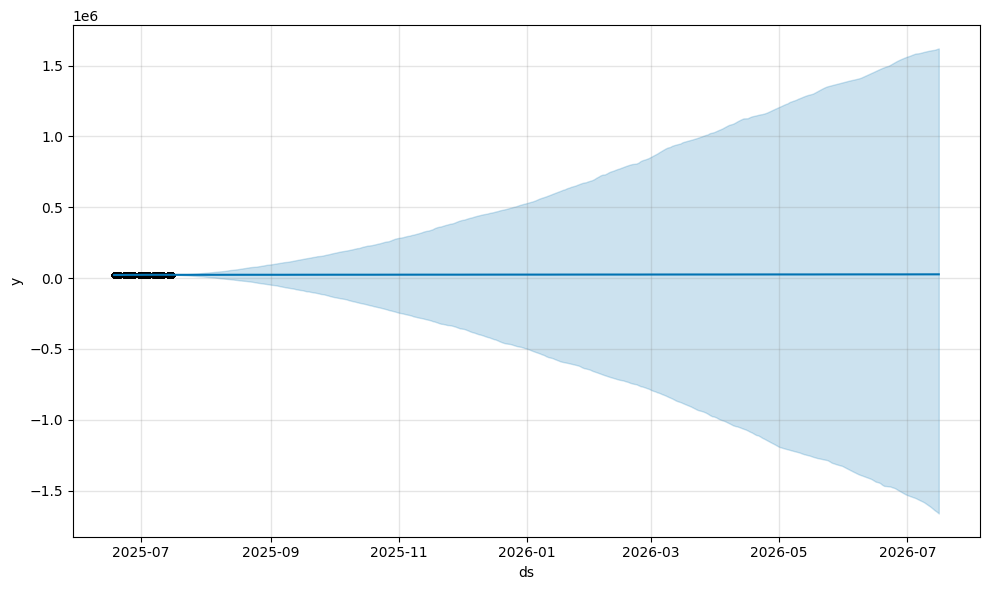

In [27]:
fig1 = m.plot(forecast)

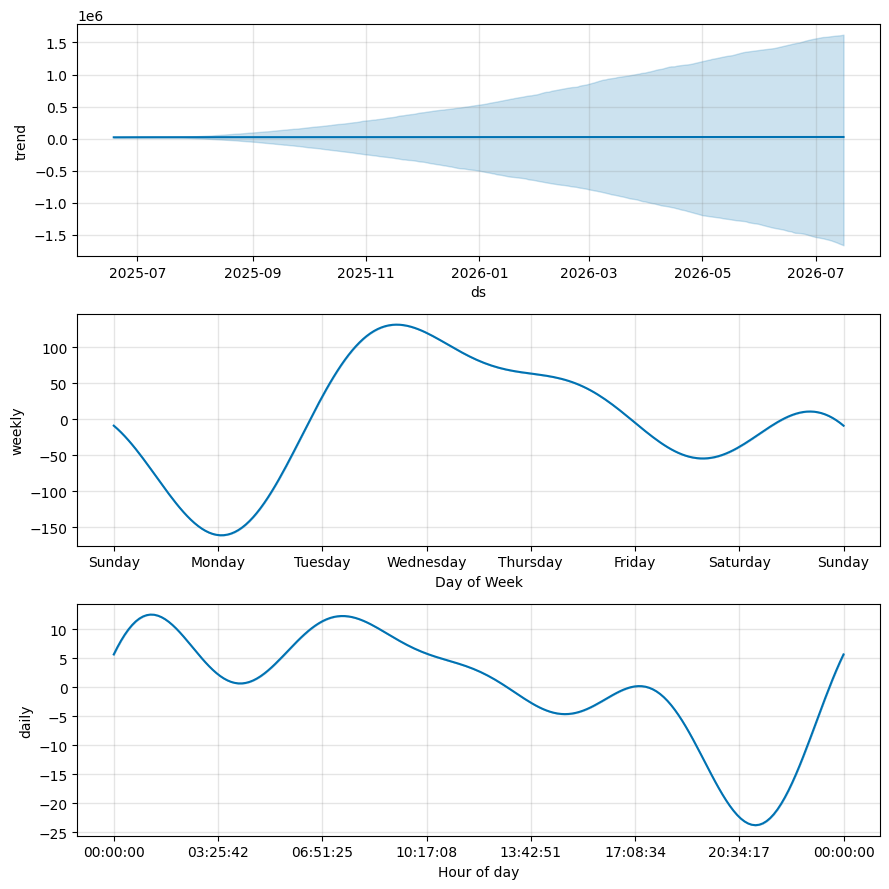

In [28]:
fig2 = m.plot_components(forecast)

In [29]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [30]:
plot_components_plotly(m, forecast)
